# Insurance Dataset (**Regression Problem**)

#### You can get this dataset right [here](https://www.kaggle.com/datasets/mohammedbuallay/insurence-dataset-latest)

#### About the Dataset

<center>  

| <h4>age | <h4>sex | <h4>bmi (Body Mass Index) | <h4>children | <h4>smoker | <h4>region | <h4>expenses |  
|:---:|:---:|:---------------------:|:--------:|:------:|:------:|:--------:|
| <h4>Numerical | <h4>Categorical | <h4>Numerical | <h4>Numerical | <h4> Categorical | <h4>Categorical | <h4>Numerical |
</center>

# Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

# Unzipping the dataset 📖

In [2]:
root_path = "./sample_data"
zip_path = f"{root_path}/insurance.zip"

with zipfile.ZipFile(zip_path, "r") as zip_content:
    zip_content.extractall(root_path)

In [3]:
# Returns a DataFrame
insurance = pd.read_excel(f"{root_path}/insurance.xlsx")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
insurance.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

# Visual Analysis of the Dataset



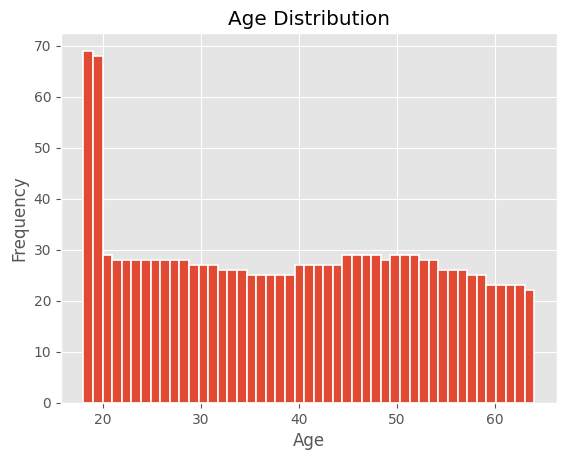

In [7]:
ages = insurance['age']
plt.style.use('ggplot')
plt.hist(ages, bins=len(ages.unique()), edgecolor='white', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

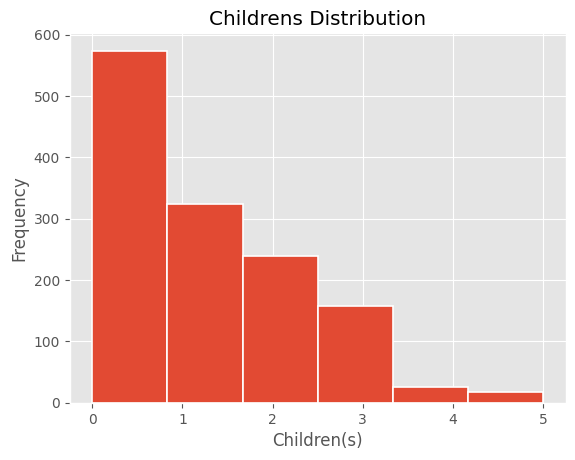

In [8]:
childrens = insurance['children']
plt.style.use('ggplot')
plt.hist(childrens, bins=len(childrens.unique()), edgecolor='white', linewidth=1.2)
plt.xlabel('Children(s)')
plt.ylabel('Frequency')
plt.title('Childrens Distribution')
plt.show()

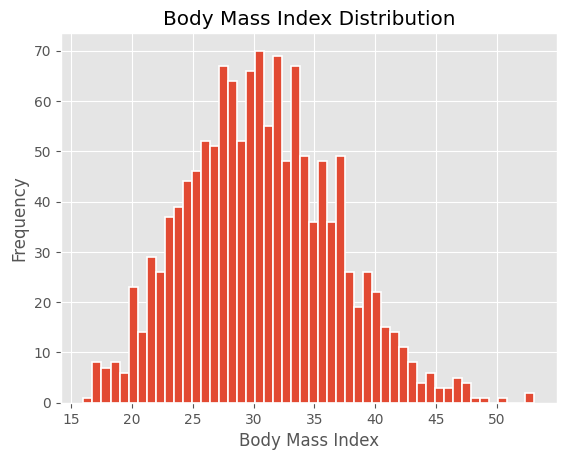

In [9]:
bmis = insurance['bmi']
plt.style.use('ggplot')
plt.hist(bmis, bins=50, edgecolor='white', linewidth=1.2)
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.title('Body Mass Index Distribution')
plt.show()

# Analysis using **OLS**

#### General Linear Regression Formula:  

$$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon$$  

#### Such that, $n$ is the number os parameters (In insurance dataset $n = 6$); $\beta_0$ is the linear coefficient, the $\epsilon$ is the error;
and the $y$ is the target value (expenses).  

#### Observations: The Statistical model **OLS** (Ordinary Least Squares) create *Dummies* for categorical data by default (When it is binary) - Perfect Multicollinearity is created!

In [10]:
import statsmodels.formula.api as smf

# formula: target ~ variables (Xs)
model = smf.ols(formula='expenses ~ children + age + bmi + smoker + sex + region', data=insurance)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:43:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    987.811    -12.089      0.000   -1.39e+04      -1e+04
smoker[T.yes]        2.385e+04    413.139     57.723      0.000     2.3e+04    2.47e+04
sex[T.male]          -131.3520    332.935     -0.395      0.693    -784.488     521.784
region[T.northwest]  -352.7901    476.261     -0.741      0.459   -1287.095     581.515
region[T.southeast] -1035.5957    478.681     -2.163      0.031   -1974.648     -96.544
region[T.southwest]  -959.3058    477.912     -2.007      0.045   -1896.850     -21.762
children              475.6889    137.800      3.452      0.001     205.360     746.017
age                   256.8392     11.899     21.586      0.000     233.497     280.181
bmi                   339.2899     28.598     11.864      0.000     283.187     395.393
==============================================================================
Omnibus:                      300.499   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.382
Skew:                           1.212   Prob(JB):                    6.14e-157
Kurtosis:                       5.652   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Looking at the Residues

In [11]:
rmean = np.mean(results.resid)
rstdev = np.std(results.resid)

print(f'[+] Residues Mean: {rmean:.4f}')
print(f'[+] Residues StDev: {rstdev:.4f}')

[+] Residues Mean: -0.0000
[+] Residues StDev: 6041.4925


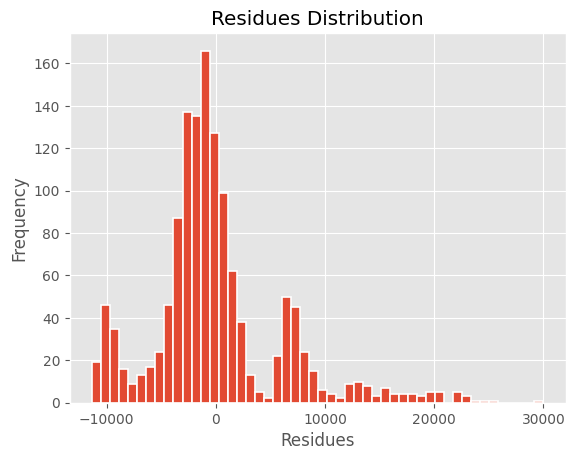

In [12]:
residues = pd.Series(results.resid)
plt.hist(residues, bins=50, edgecolor='white', linewidth=1.2)
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.title('Residues Distribution')
plt.show()

# Splitting the features (Numerical and Categorical)

In [13]:
target = ['expenses']

In [14]:
num_features = [
  col for col in insurance.columns
  if insurance[col].dtype != "object" and col != "expenses"
]

print(num_features)

['age', 'bmi', 'children']


In [15]:
cat_features = [
  col for col in insurance.columns
  if insurance[col].dtype == "object"
]

print(cat_features)

['sex', 'smoker', 'region']


# Splitting the Dataset (Train and Test)

In [16]:
X = insurance[cat_features + num_features]
y = insurance[target]

# Dataset Pre Processing

In [18]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [28]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Target Encoder

#### Description: Each category is encoded based on a shrunk estimate of the average target values for observations belonging to the category

In [22]:
encoder = TargetEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train, y_train)
X_test  = encoder.transform(X_test)

In [23]:
X_train.head()

,sex,smoker,region,age,bmi,children
332,12877.646930,8542.875358,12554.743407,61,31.2,0
355,13855.592437,8542.875358,12994.585811,46,27.6,0
138,12877.646930,8542.875358,14339.490860,54,31.9,3
381,13855.592437,31757.028923,13544.486763,55,30.7,0
292,13855.592437,31757.028923,14339.490860,25,45.5,2


# Training the Model (**Linear Regressor**)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

print(f"[+] M. A. E. = {mean_absolute_error(y_test, y_pred):.5f}")
print(f"[+] R. M. S. E. = {np.sqrt(mean_squared_error(y_test, y_pred)):.5f}")

[+] M. A. E. = 4166.82413
[+] R. M. S. E. = 5827.61941


# Visualization of the Model Performance

#### matplotlib styles at [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

40969.11997278937


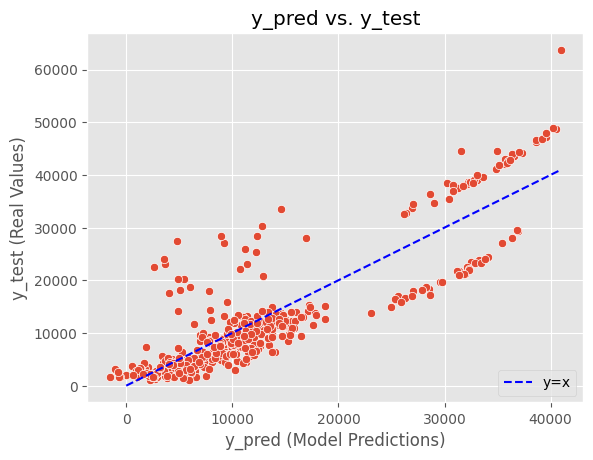

In [26]:
X = np.array(y_pred)
X_max = max(X)

p = X_max[0]
print(p)

#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-notebook')
plt.plot([0, p], [0, p], color='blue', linestyle='--', label='y=x')
plt.scatter(y_pred, y_test, edgecolor='white')
plt.title('y_pred vs. y_test')
plt.xlabel('y_pred (Model Predictions)')
plt.ylabel('y_test (Real Values)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Visualizing the Residue

In [35]:
model_res = y_pred - y_test

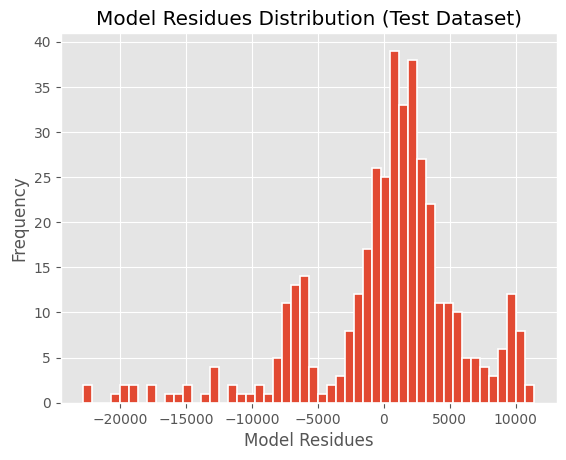

In [34]:
model_residues = model_res['expenses']
plt.hist(model_residues, bins=50, edgecolor='white', linewidth=1.2)
plt.xlabel('Model Residues')
plt.ylabel('Frequency')
plt.title('Model Residues Distribution (Test Dataset)')
plt.show()